# 1. Setup

## 1.1 Install Dependencies

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

2023-04-13 09:50:08.928606: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [167]:
batch_size = 32
img_height = 48
img_width = 48

train_data_dir = os.path.join(os.pardir, os.pardir, "Data", "AAUT2IA_TEST", "train")
test_data_dir = os.path.join(os.pardir, os.pardir, "Data", "AAUT2IA_TEST", "test")

## 1.2 Load Data

In [168]:
train_ds = tf.keras.utils.image_dataset_from_directory(train_data_dir,
  color_mode='grayscale',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds =  tf.keras.utils.image_dataset_from_directory(train_data_dir,
  color_mode='grayscale',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 28273 files belonging to 6 classes.
Using 22619 files for training.
Found 28273 files belonging to 6 classes.
Using 5654 files for validation.


# 2 Visualize Data

In [169]:
class_names = train_ds.class_names
print(class_names)

['angry', 'fear', 'happy', 'neutral', 'sad', 'surprise']


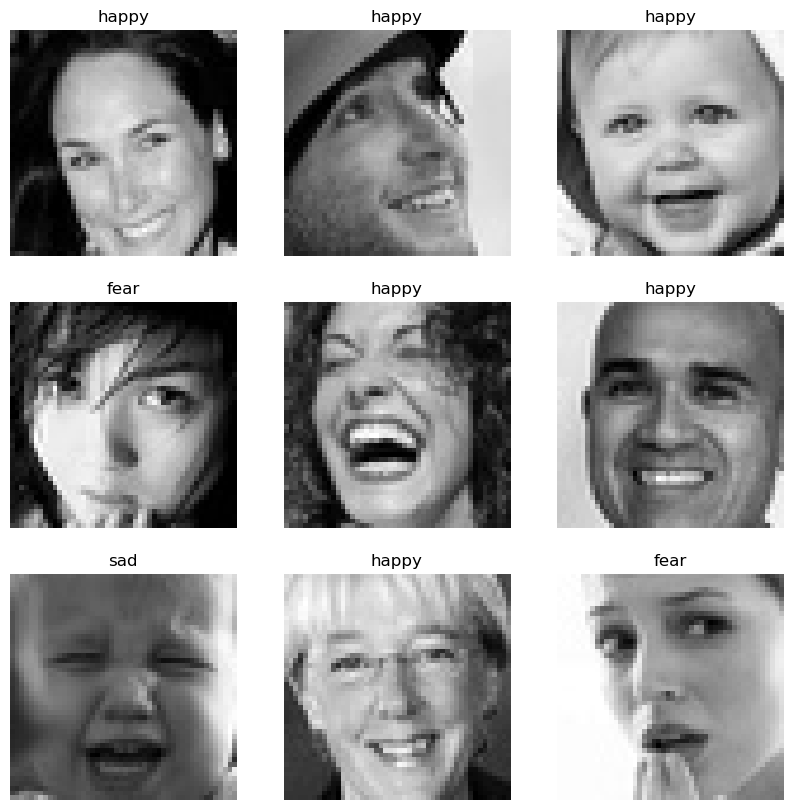

In [170]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"), cmap='gray')
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [171]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 48, 48, 1)
(32,)


# 3. Configure Dataset Performance

In [172]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# 4. Modeling Data

## 4.1 Creating Model

In [173]:
num_classes = len(class_names)

In [28]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
  layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 48, 48, 1)         0         
                                                                 
 conv2d_10 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 24, 24, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 12, 12, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 12, 12, 256)      

## 4.2 Compiling Model

In [29]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## 4.3 Fitting Model

In [30]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
718/718 [==============================] - 107s 148ms/step - loss: 1.6435 - accuracy: 0.3482 - val_loss: 1.4590 - val_accuracy: 0.4412
Epoch 2/10
718/718 [==============================] - 118s 164ms/step - loss: 1.3543 - accuracy: 0.4838 - val_loss: 1.2846 - val_accuracy: 0.5182
Epoch 3/10
718/718 [==============================] - 120s 166ms/step - loss: 1.1978 - accuracy: 0.5440 - val_loss: 1.2539 - val_accuracy: 0.5292
Epoch 4/10
718/718 [==============================] - 136s 190ms/step - loss: 1.0716 - accuracy: 0.5982 - val_loss: 1.2418 - val_accuracy: 0.5496
Epoch 5/10
718/718 [==============================] - 149s 207ms/step - loss: 0.9310 - accuracy: 0.6531 - val_loss: 1.2499 - val_accuracy: 0.5513
Epoch 6/10
718/718 [==============================] - 126s 176ms/step - loss: 0.7726 - accuracy: 0.7145 - val_loss: 1.2736 - val_accuracy: 0.5612
Epoch 7/10
718/718 [==============================] - 110s 153ms/step - loss: 0.5905 - accuracy: 0.7848 - val_loss: 1.4755 -

## 4.4 Results

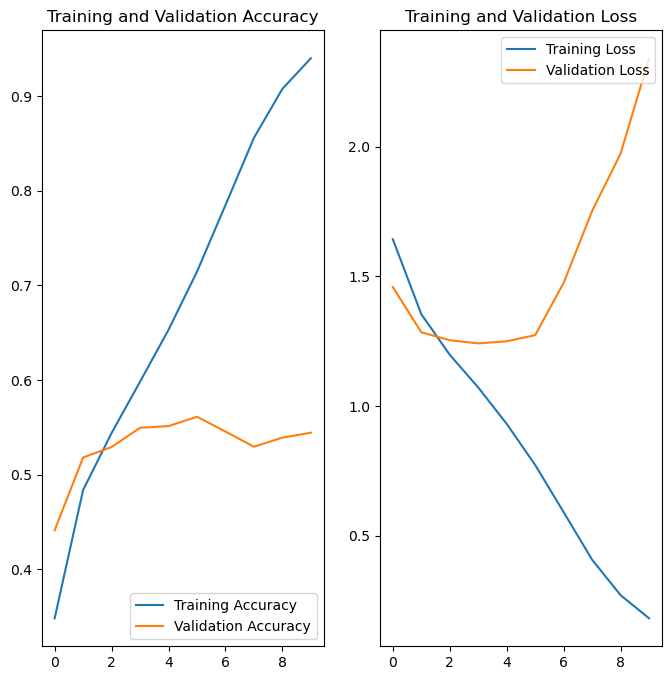

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# 5. Data Augmentation

In [94]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  1)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [33]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
  layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 48, 48, 1)         0         
                                                                 
 rescaling_4 (Rescaling)     (None, 48, 48, 1)         0         
                                                                 
 conv2d_13 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 24, 24, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 12, 12, 128)      0         
 g2D)                                                 

In [34]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [35]:
epochs=32
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/32
718/718 [==============================] - 134s 183ms/step - loss: 1.7720 - accuracy: 0.2705 - val_loss: 1.6892 - val_accuracy: 0.3085
Epoch 2/32
718/718 [==============================] - 135s 188ms/step - loss: 1.6490 - accuracy: 0.3440 - val_loss: 1.5300 - val_accuracy: 0.4008
Epoch 3/32
718/718 [==============================] - 115s 160ms/step - loss: 1.5305 - accuracy: 0.4094 - val_loss: 1.4666 - val_accuracy: 0.4409
Epoch 4/32
718/718 [==============================] - 119s 165ms/step - loss: 1.4452 - accuracy: 0.4417 - val_loss: 1.3552 - val_accuracy: 0.4797
Epoch 5/32
718/718 [==============================] - 133s 186ms/step - loss: 1.3751 - accuracy: 0.4714 - val_loss: 1.3312 - val_accuracy: 0.4931
Epoch 6/32
718/718 [==============================] - 130s 181ms/step - loss: 1.3318 - accuracy: 0.4883 - val_loss: 1.2812 - val_accuracy: 0.5199
Epoch 7/32
718/718 [==============================] - 173s 241ms/step - loss: 1.2883 - accuracy: 0.5106 - val_loss: 1.2953 -

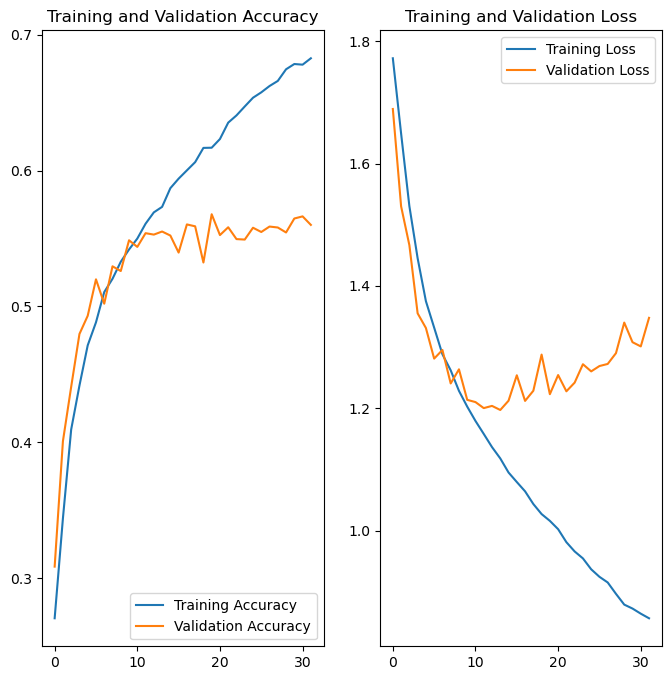

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [40]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
  layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 48, 48, 1)         0         
                                                                 
 rescaling_6 (Rescaling)     (None, 48, 48, 1)         0         
                                                                 
 conv2d_19 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                 

In [41]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [42]:
epochs=32
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/32
718/718 [==============================] - 69s 92ms/step - loss: 1.7834 - accuracy: 0.2617 - val_loss: 1.7120 - val_accuracy: 0.3033
Epoch 2/32
718/718 [==============================] - 62s 87ms/step - loss: 1.7088 - accuracy: 0.3094 - val_loss: 1.6338 - val_accuracy: 0.3602
Epoch 3/32
718/718 [==============================] - 65s 90ms/step - loss: 1.6223 - accuracy: 0.3628 - val_loss: 1.5102 - val_accuracy: 0.4271
Epoch 4/32
718/718 [==============================] - 67s 93ms/step - loss: 1.5475 - accuracy: 0.3999 - val_loss: 1.4255 - val_accuracy: 0.4522
Epoch 5/32
718/718 [==============================] - 66s 92ms/step - loss: 1.4940 - accuracy: 0.4217 - val_loss: 1.3859 - val_accuracy: 0.4745
Epoch 6/32
718/718 [==============================] - 67s 93ms/step - loss: 1.4496 - accuracy: 0.4423 - val_loss: 1.3303 - val_accuracy: 0.4928
Epoch 7/32
718/718 [==============================] - 63s 88ms/step - loss: 1.4194 - accuracy: 0.4558 - val_loss: 1.3188 - val_accuracy:

KeyboardInterrupt: 

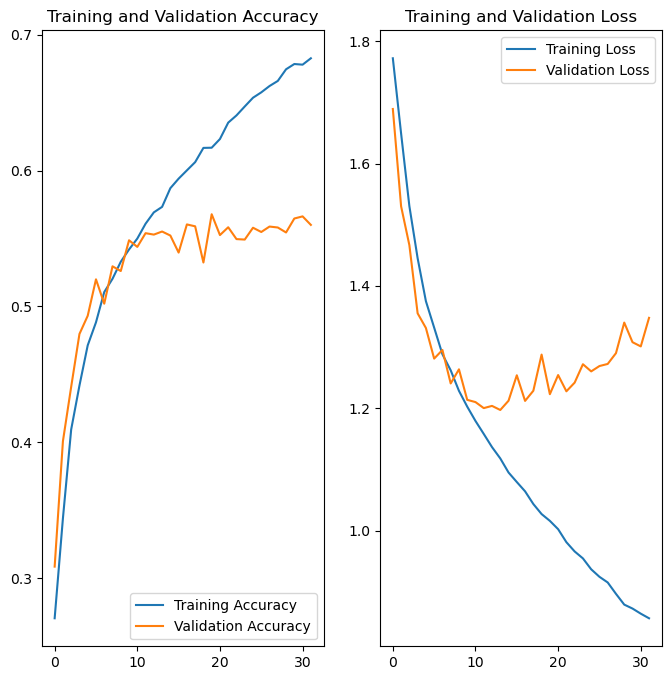

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [44]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
  layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.25),
  layers.Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 48, 48, 1)         0         
                                                                 
 rescaling_7 (Rescaling)     (None, 48, 48, 1)         0         
                                                                 
 conv2d_22 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                 

In [45]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [46]:
epochs=32
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/32
718/718 [==============================] - 68s 91ms/step - loss: 1.7864 - accuracy: 0.2640 - val_loss: 1.7151 - val_accuracy: 0.3071
Epoch 2/32
718/718 [==============================] - 65s 90ms/step - loss: 1.6802 - accuracy: 0.3303 - val_loss: 1.5809 - val_accuracy: 0.3856
Epoch 3/32
718/718 [==============================] - 64s 89ms/step - loss: 1.5812 - accuracy: 0.3824 - val_loss: 1.4838 - val_accuracy: 0.4360
Epoch 4/32
718/718 [==============================] - 64s 89ms/step - loss: 1.5059 - accuracy: 0.4171 - val_loss: 1.4218 - val_accuracy: 0.4628
Epoch 5/32
718/718 [==============================] - 64s 89ms/step - loss: 1.4487 - accuracy: 0.4380 - val_loss: 1.3685 - val_accuracy: 0.4771
Epoch 6/32
718/718 [==============================] - 64s 89ms/step - loss: 1.4055 - accuracy: 0.4597 - val_loss: 1.3425 - val_accuracy: 0.4821
Epoch 7/32
718/718 [==============================] - 64s 89ms/step - loss: 1.3745 - accuracy: 0.4684 - val_loss: 1.3285 - val_accuracy:

KeyboardInterrupt: 

In [47]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
  layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 48, 48, 1)         0         
                                                                 
 rescaling_8 (Rescaling)     (None, 48, 48, 1)         0         
                                                                 
 conv2d_25 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 24, 24, 64)       

In [48]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [49]:
epochs=32
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/32
718/718 [==============================] - 87s 115ms/step - loss: 1.9490 - accuracy: 0.2551 - val_loss: 1.7059 - val_accuracy: 0.3437
Epoch 2/32
718/718 [==============================] - 83s 116ms/step - loss: 1.7133 - accuracy: 0.3117 - val_loss: 1.5642 - val_accuracy: 0.3876
Epoch 3/32
718/718 [==============================] - 91s 126ms/step - loss: 1.6420 - accuracy: 0.3442 - val_loss: 1.6809 - val_accuracy: 0.3226
Epoch 4/32
718/718 [==============================] - 89s 124ms/step - loss: 1.5831 - accuracy: 0.3676 - val_loss: 1.4803 - val_accuracy: 0.4278
Epoch 5/32
718/718 [==============================] - 95s 133ms/step - loss: 1.5610 - accuracy: 0.3826 - val_loss: 1.5075 - val_accuracy: 0.4280
Epoch 6/32
718/718 [==============================] - 84s 117ms/step - loss: 1.5188 - accuracy: 0.3972 - val_loss: 1.4886 - val_accuracy: 0.4295
Epoch 7/32
718/718 [==============================] - 87s 121ms/step - loss: 1.4959 - accuracy: 0.4089 - val_loss: 1.4240 - val_ac

KeyboardInterrupt: 

In [50]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
  layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_9 (Rescaling)     (None, 48, 48, 1)         0         
                                                                 
 conv2d_28 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_3 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 24, 24, 128)       73856     
                                                                 
 batch_normalization_4 (Batc  (None, 24, 24, 128)    

In [51]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [52]:
epochs=32
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/32
718/718 [==============================] - 166s 229ms/step - loss: 1.8286 - accuracy: 0.3586 - val_loss: 1.6055 - val_accuracy: 0.3769
Epoch 2/32
718/718 [==============================] - 152s 211ms/step - loss: 1.3350 - accuracy: 0.4871 - val_loss: 1.4162 - val_accuracy: 0.4726
Epoch 3/32
718/718 [==============================] - 153s 213ms/step - loss: 1.1934 - accuracy: 0.5464 - val_loss: 1.5562 - val_accuracy: 0.4358
Epoch 4/32
718/718 [==============================] - 152s 212ms/step - loss: 1.0747 - accuracy: 0.6028 - val_loss: 1.3969 - val_accuracy: 0.4626
Epoch 5/32
718/718 [==============================] - 150s 209ms/step - loss: 0.9515 - accuracy: 0.6476 - val_loss: 1.6987 - val_accuracy: 0.4348
Epoch 6/32
718/718 [==============================] - 152s 212ms/step - loss: 0.7807 - accuracy: 0.7137 - val_loss: 1.3819 - val_accuracy: 0.5219
Epoch 7/32
718/718 [==============================] - 151s 210ms/step - loss: 0.6018 - accuracy: 0.7816 - val_loss: 1.5331 -

KeyboardInterrupt: 

In [53]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
  layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.k1),
  layers.Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_10 (Rescaling)    (None, 48, 48, 1)         0         
                                                                 
 conv2d_31 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_6 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 24, 24, 128)       73856     
                                                                 
 batch_normalization_7 (Batc  (None, 24, 24, 128)    

In [54]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [55]:
epochs=32
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/32
718/718 [==============================] - 167s 231ms/step - loss: 1.7565 - accuracy: 0.3652 - val_loss: 1.5159 - val_accuracy: 0.4128
Epoch 2/32
718/718 [==============================] - 156s 217ms/step - loss: 1.3341 - accuracy: 0.4804 - val_loss: 1.5754 - val_accuracy: 0.3877
Epoch 3/32
718/718 [==============================] - 170s 236ms/step - loss: 1.1906 - accuracy: 0.5445 - val_loss: 1.2334 - val_accuracy: 0.5354
Epoch 4/32
718/718 [==============================] - 152s 212ms/step - loss: 1.0717 - accuracy: 0.5935 - val_loss: 1.4836 - val_accuracy: 0.4642
Epoch 5/32
718/718 [==============================] - 161s 225ms/step - loss: 0.9375 - accuracy: 0.6485 - val_loss: 1.5424 - val_accuracy: 0.4510
Epoch 6/32
718/718 [==============================] - 165s 229ms/step - loss: 0.7905 - accuracy: 0.7072 - val_loss: 1.2823 - val_accuracy: 0.5482
Epoch 7/32
718/718 [==============================] - 164s 229ms/step - loss: 0.6419 - accuracy: 0.7645 - val_loss: 1.5103 -

KeyboardInterrupt: 

In [59]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
  layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_12 (Rescaling)    (None, 48, 48, 1)         0         
                                                                 
 conv2d_37 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_12 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 24, 24, 128)       73856     
                                                                 
 batch_normalization_13 (Bat  (None, 24, 24, 128)    

In [60]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [61]:
epochs=32
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/32
718/718 [==============================] - 160s 221ms/step - loss: 2.1372 - accuracy: 0.2732 - val_loss: 1.6885 - val_accuracy: 0.3224
Epoch 2/32
718/718 [==============================] - 146s 203ms/step - loss: 1.6332 - accuracy: 0.3442 - val_loss: 1.6087 - val_accuracy: 0.3492
Epoch 3/32
718/718 [==============================] - 146s 204ms/step - loss: 1.5501 - accuracy: 0.3788 - val_loss: 1.6217 - val_accuracy: 0.3377
Epoch 4/32
718/718 [==============================] - 148s 206ms/step - loss: 1.4969 - accuracy: 0.3940 - val_loss: 1.6752 - val_accuracy: 0.3358
Epoch 5/32
718/718 [==============================] - 148s 205ms/step - loss: 1.4635 - accuracy: 0.4113 - val_loss: 1.4857 - val_accuracy: 0.4142
Epoch 6/32
718/718 [==============================] - 148s 206ms/step - loss: 1.4173 - accuracy: 0.4297 - val_loss: 1.5258 - val_accuracy: 0.4003
Epoch 7/32
718/718 [==============================] - 147s 205ms/step - loss: 1.3787 - accuracy: 0.4437 - val_loss: 1.3894 -

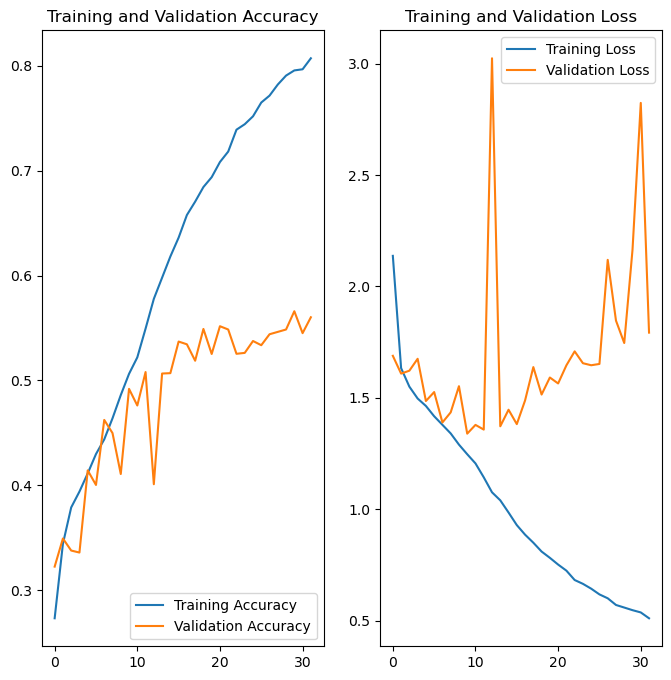

In [62]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [67]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
  layers.Conv2D(32, (3, 3), activation='relu'),
  layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.25),
  layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_17 (Rescaling)    (None, 48, 48, 1)         0         
                                                                 
 conv2d_53 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 conv2d_54 (Conv2D)          (None, 46, 46, 64)        18496     
                                                                 
 batch_normalization_27 (Bat  (None, 46, 46, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 dropout_27 (Dropout)        (None, 23, 23, 64)      

In [68]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [69]:
epochs=32
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/32
718/718 [==============================] - 184s 255ms/step - loss: 1.9514 - accuracy: 0.2836 - val_loss: 1.6867 - val_accuracy: 0.3327
Epoch 2/32
718/718 [==============================] - 185s 257ms/step - loss: 1.5921 - accuracy: 0.3725 - val_loss: 1.5369 - val_accuracy: 0.4128
Epoch 3/32
718/718 [==============================] - 179s 249ms/step - loss: 1.5025 - accuracy: 0.4103 - val_loss: 1.4290 - val_accuracy: 0.4560
Epoch 4/32
718/718 [==============================] - 179s 250ms/step - loss: 1.4436 - accuracy: 0.4434 - val_loss: 1.4246 - val_accuracy: 0.4454
Epoch 5/32
718/718 [==============================] - 179s 250ms/step - loss: 1.3898 - accuracy: 0.4645 - val_loss: 1.4870 - val_accuracy: 0.4386
Epoch 6/32
718/718 [==============================] - 174s 243ms/step - loss: 1.3447 - accuracy: 0.4845 - val_loss: 1.3797 - val_accuracy: 0.4776
Epoch 7/32
718/718 [==============================] - 172s 240ms/step - loss: 1.3009 - accuracy: 0.5026 - val_loss: 1.2623 -

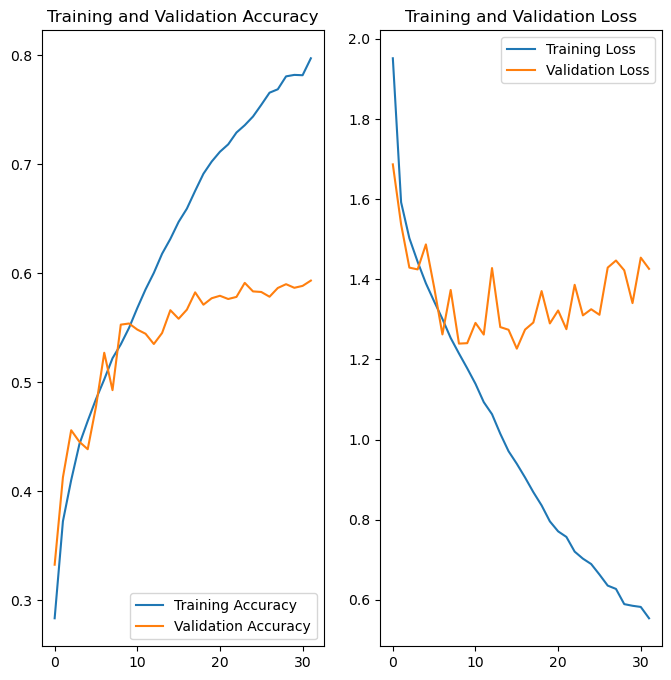

In [70]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [71]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
  layers.Conv2D(32, (3, 3), activation='relu'),
  layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.1),
  layers.Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_18 (Rescaling)    (None, 48, 48, 1)         0         
                                                                 
 conv2d_57 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 conv2d_58 (Conv2D)          (None, 46, 46, 64)        18496     
                                                                 
 batch_normalization_30 (Bat  (None, 46, 46, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_59 (Conv2D)          (None, 23, 23, 128)     

In [72]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [73]:
epochs=32
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/32
718/718 [==============================] - 166s 228ms/step - loss: 1.7906 - accuracy: 0.3520 - val_loss: 1.6770 - val_accuracy: 0.3454
Epoch 2/32
718/718 [==============================] - 162s 226ms/step - loss: 1.3709 - accuracy: 0.4762 - val_loss: 1.3446 - val_accuracy: 0.4896
Epoch 3/32
718/718 [==============================] - 167s 232ms/step - loss: 1.2227 - accuracy: 0.5363 - val_loss: 1.3065 - val_accuracy: 0.5130
Epoch 4/32
718/718 [==============================] - 163s 227ms/step - loss: 1.1019 - accuracy: 0.5832 - val_loss: 1.2980 - val_accuracy: 0.4975
Epoch 5/32
718/718 [==============================] - 164s 228ms/step - loss: 0.9872 - accuracy: 0.6344 - val_loss: 1.4034 - val_accuracy: 0.4875
Epoch 6/32
718/718 [==============================] - 162s 225ms/step - loss: 0.8619 - accuracy: 0.6782 - val_loss: 1.3286 - val_accuracy: 0.5480
Epoch 7/32
718/718 [==============================] - 162s 225ms/step - loss: 0.6913 - accuracy: 0.7395 - val_loss: 1.4821 -

In [74]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
  layers.Conv2D(16, (3, 3), activation='relu'),
  layers.Conv2D(32, (3, 3), activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(128, (3, 3), activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.1),
  layers.Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_19 (Rescaling)    (None, 48, 48, 1)         0         
                                                                 
 conv2d_61 (Conv2D)          (None, 46, 46, 16)        160       
                                                                 
 conv2d_62 (Conv2D)          (None, 44, 44, 32)        4640      
                                                                 
 batch_normalization_33 (Bat  (None, 44, 44, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_58 (MaxPoolin  (None, 22, 22, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_63 (Conv2D)          (None, 20, 20, 64)      

In [75]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [76]:
epochs=32
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/32
718/718 [==============================] - 83s 114ms/step - loss: 1.6122 - accuracy: 0.3934 - val_loss: 1.4753 - val_accuracy: 0.4339
Epoch 2/32
718/718 [==============================] - 99s 138ms/step - loss: 1.2971 - accuracy: 0.5023 - val_loss: 1.4380 - val_accuracy: 0.4369
Epoch 3/32
718/718 [==============================] - 99s 138ms/step - loss: 1.1485 - accuracy: 0.5630 - val_loss: 1.2356 - val_accuracy: 0.5358
Epoch 4/32
718/718 [==============================] - 99s 139ms/step - loss: 1.0209 - accuracy: 0.6145 - val_loss: 1.3309 - val_accuracy: 0.5246
Epoch 5/32
718/718 [==============================] - 98s 137ms/step - loss: 0.8552 - accuracy: 0.6800 - val_loss: 1.2734 - val_accuracy: 0.5546
Epoch 6/32
718/718 [==============================] - 104s 145ms/step - loss: 0.6712 - accuracy: 0.7531 - val_loss: 1.4781 - val_accuracy: 0.5201
Epoch 7/32
718/718 [==============================] - 110s 153ms/step - loss: 0.4943 - accuracy: 0.8229 - val_loss: 1.8393 - val_

KeyboardInterrupt: 

In [82]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
  layers.Conv2D(16, (3, 3), activation='relu'),
  layers.Conv2D(32, (3, 3), activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(128, (3, 3), activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.1),
  layers.Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_22 (Rescaling)    (None, 48, 48, 1)         0         
                                                                 
 conv2d_73 (Conv2D)          (None, 46, 46, 16)        160       
                                                                 
 conv2d_74 (Conv2D)          (None, 44, 44, 32)        4640      
                                                                 
 batch_normalization_42 (Bat  (None, 44, 44, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_67 (MaxPoolin  (None, 22, 22, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_75 (Conv2D)          (None, 20, 20, 64)      

In [79]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [80]:
epochs=32
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/32
718/718 [==============================] - 77s 105ms/step - loss: 1.6900 - accuracy: 0.3772 - val_loss: 1.4649 - val_accuracy: 0.4412
Epoch 2/32
718/718 [==============================] - 78s 108ms/step - loss: 1.3062 - accuracy: 0.5081 - val_loss: 1.4114 - val_accuracy: 0.4679
Epoch 3/32
718/718 [==============================] - 81s 113ms/step - loss: 1.0987 - accuracy: 0.5964 - val_loss: 1.3623 - val_accuracy: 0.5024
Epoch 4/32
718/718 [==============================] - 75s 104ms/step - loss: 0.9108 - accuracy: 0.6728 - val_loss: 1.3549 - val_accuracy: 0.5130
Epoch 5/32
718/718 [==============================] - 72s 100ms/step - loss: 0.7190 - accuracy: 0.7527 - val_loss: 1.3830 - val_accuracy: 0.5118
Epoch 6/32
718/718 [==============================] - 79s 110ms/step - loss: 0.5315 - accuracy: 0.8292 - val_loss: 1.4132 - val_accuracy: 0.5151
Epoch 7/32
718/718 [==============================] - 101s 140ms/step - loss: 0.3796 - accuracy: 0.8922 - val_loss: 1.4538 - val_a

KeyboardInterrupt: 

In [83]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
  layers.Conv2D(16, (3, 3), activation='relu'),
  layers.Conv2D(32, (3, 3), activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.25),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.25),
  layers.Conv2D(128, (3, 3), activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.1),
  layers.Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_23 (Rescaling)    (None, 48, 48, 1)         0         
                                                                 
 conv2d_77 (Conv2D)          (None, 46, 46, 16)        160       
                                                                 
 conv2d_78 (Conv2D)          (None, 44, 44, 32)        4640      
                                                                 
 batch_normalization_45 (Bat  (None, 44, 44, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_70 (MaxPoolin  (None, 22, 22, 32)       0         
 g2D)                                                            
                                                                 
 dropout_38 (Dropout)        (None, 22, 22, 32)      

In [84]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [85]:
epochs=32
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/32
718/718 [==============================] - 79s 108ms/step - loss: 1.9006 - accuracy: 0.2966 - val_loss: 1.7370 - val_accuracy: 0.3654
Epoch 2/32
718/718 [==============================] - 75s 104ms/step - loss: 1.6032 - accuracy: 0.3744 - val_loss: 1.5427 - val_accuracy: 0.4212
Epoch 3/32
718/718 [==============================] - 83s 116ms/step - loss: 1.5200 - accuracy: 0.4151 - val_loss: 1.4956 - val_accuracy: 0.4431
Epoch 4/32
718/718 [==============================] - 83s 115ms/step - loss: 1.4511 - accuracy: 0.4390 - val_loss: 1.4860 - val_accuracy: 0.4572
Epoch 5/32
718/718 [==============================] - 87s 121ms/step - loss: 1.3979 - accuracy: 0.4630 - val_loss: 1.3982 - val_accuracy: 0.4802
Epoch 6/32
718/718 [==============================] - 92s 128ms/step - loss: 1.3416 - accuracy: 0.4901 - val_loss: 1.3354 - val_accuracy: 0.5069
Epoch 7/32
718/718 [==============================] - 95s 133ms/step - loss: 1.2959 - accuracy: 0.5060 - val_loss: 1.3066 - val_ac

In [86]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
  layers.Conv2D(16, (3, 3), activation='relu'),
  layers.Conv2D(32, (3, 3), activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.25),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.25),
  layers.Conv2D(128, (3, 3), activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.1),
  layers.Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 48, 48, 1)         0         
                                                                 
 rescaling_24 (Rescaling)    (None, 48, 48, 1)         0         
                                                                 
 conv2d_81 (Conv2D)          (None, 46, 46, 16)        160       
                                                                 
 conv2d_82 (Conv2D)          (None, 44, 44, 32)        4640      
                                                                 
 batch_normalization_48 (Bat  (None, 44, 44, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_73 (MaxPoolin  (None, 22, 22, 32)       0         
 g2D)                                                

In [87]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [95]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=64,
  batch_size=64
)

Epoch 1/64
1436/1436 [==============================] - 110s 73ms/step - loss: 1.9294 - accuracy: 0.2597 - val_loss: 1.6759 - val_accuracy: 0.3532
Epoch 2/64
1436/1436 [==============================] - 110s 77ms/step - loss: 1.7058 - accuracy: 0.3199 - val_loss: 1.6537 - val_accuracy: 0.3698
Epoch 3/64
1436/1436 [==============================] - 105s 73ms/step - loss: 1.6252 - accuracy: 0.3593 - val_loss: 1.7327 - val_accuracy: 0.3733
Epoch 4/64
1436/1436 [==============================] - 105s 73ms/step - loss: 1.5762 - accuracy: 0.3810 - val_loss: 1.5982 - val_accuracy: 0.4072
Epoch 5/64
1436/1436 [==============================] - 105s 73ms/step - loss: 1.5217 - accuracy: 0.4072 - val_loss: 1.4720 - val_accuracy: 0.4374
Epoch 6/64
1436/1436 [==============================] - 105s 73ms/step - loss: 1.4788 - accuracy: 0.4218 - val_loss: 1.3696 - val_accuracy: 0.4750
Epoch 7/64
1436/1436 [==============================] - 104s 72ms/step - loss: 1.4390 - accuracy: 0.4444 - val_loss: 1

In [97]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
  layers.Conv2D(16, (3, 3), activation='relu'),
  layers.Conv2D(32, (3, 3), activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.25),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.25),
  layers.Conv2D(128, (3, 3), activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.1),
  layers.Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_24 (Sequential)  (None, 48, 48, 1)         0         
                                                                 
 rescaling_25 (Rescaling)    (None, 48, 48, 1)         0         
                                                                 
 conv2d_85 (Conv2D)          (None, 46, 46, 16)        160       
                                                                 
 conv2d_86 (Conv2D)          (None, 44, 44, 32)        4640      
                                                                 
 batch_normalization_51 (Bat  (None, 44, 44, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_76 (MaxPoolin  (None, 22, 22, 32)       0         
 g2D)                                                

In [98]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [100]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=32
  #batch_size=64
)

Epoch 1/32
1436/1436 [==============================] - 106s 74ms/step - loss: 1.7241 - accuracy: 0.3094 - val_loss: 1.6279 - val_accuracy: 0.3712
Epoch 2/32
1436/1436 [==============================] - 106s 74ms/step - loss: 1.6559 - accuracy: 0.3443 - val_loss: 1.5861 - val_accuracy: 0.3816
Epoch 3/32
1436/1436 [==============================] - 110s 77ms/step - loss: 1.6016 - accuracy: 0.3728 - val_loss: 1.7117 - val_accuracy: 0.3837
Epoch 4/32
1436/1436 [==============================] - 105s 73ms/step - loss: 1.5529 - accuracy: 0.3963 - val_loss: 1.4591 - val_accuracy: 0.4428
Epoch 5/32
1436/1436 [==============================] - 104s 72ms/step - loss: 1.5184 - accuracy: 0.4066 - val_loss: 1.5357 - val_accuracy: 0.4062
Epoch 6/32
1436/1436 [==============================] - 102s 71ms/step - loss: 1.4652 - accuracy: 0.4349 - val_loss: 1.4273 - val_accuracy: 0.4682
Epoch 7/32
1436/1436 [==============================] - 95s 66ms/step - loss: 1.4334 - accuracy: 0.4471 - val_loss: 1.

In [124]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
  layers.Conv2D(16, (3, 3), activation='relu'),
  layers.Conv2D(32, (3, 3), activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.25),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.25),
  layers.Conv2D(128, (3, 3), activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.1),
  layers.Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_30 (Rescaling)    (None, 48, 48, 1)         0         
                                                                 
 conv2d_105 (Conv2D)         (None, 46, 46, 16)        160       
                                                                 
 conv2d_106 (Conv2D)         (None, 44, 44, 32)        4640      
                                                                 
 batch_normalization_66 (Bat  (None, 44, 44, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_91 (MaxPoolin  (None, 22, 22, 32)       0         
 g2D)                                                            
                                                                 
 dropout_66 (Dropout)        (None, 22, 22, 32)      

In [127]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [128]:
epochs=32
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=32,
  batch_size=16
)

Epoch 1/32
718/718 [==============================] - 84s 115ms/step - loss: 1.8544 - accuracy: 0.2972 - val_loss: 1.7385 - val_accuracy: 0.3541
Epoch 2/32
718/718 [==============================] - 73s 102ms/step - loss: 1.6399 - accuracy: 0.3631 - val_loss: 1.6402 - val_accuracy: 0.4038
Epoch 3/32
718/718 [==============================] - 79s 111ms/step - loss: 1.5622 - accuracy: 0.3941 - val_loss: 1.5594 - val_accuracy: 0.4287
Epoch 4/32
718/718 [==============================] - 77s 107ms/step - loss: 1.4963 - accuracy: 0.4240 - val_loss: 1.5699 - val_accuracy: 0.4362
Epoch 5/32
718/718 [==============================] - 77s 107ms/step - loss: 1.4360 - accuracy: 0.4470 - val_loss: 1.4319 - val_accuracy: 0.4609
Epoch 6/32
718/718 [==============================] - 77s 107ms/step - loss: 1.3823 - accuracy: 0.4687 - val_loss: 1.3774 - val_accuracy: 0.4858
Epoch 7/32
718/718 [==============================] - 76s 106ms/step - loss: 1.3320 - accuracy: 0.4926 - val_loss: 1.3557 - val_ac

KeyboardInterrupt: 

In [145]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
  layers.Conv2D(8, (3, 3), activation='relu'),
  layers.Conv2D(16, (3, 3), activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.25),
  layers.Conv2D(32, (3, 3), activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.25),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.1),
  layers.Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_32 (Rescaling)    (None, 48, 48, 1)         0         
                                                                 
 conv2d_113 (Conv2D)         (None, 46, 46, 8)         80        
                                                                 
 conv2d_114 (Conv2D)         (None, 44, 44, 16)        1168      
                                                                 
 batch_normalization_72 (Bat  (None, 44, 44, 16)       64        
 chNormalization)                                                
                                                                 
 max_pooling2d_97 (MaxPoolin  (None, 22, 22, 16)       0         
 g2D)                                                            
                                                                 
 dropout_74 (Dropout)        (None, 22, 22, 16)      

In [146]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [147]:
epochs=32
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=32,
  batch_size=32
)

Epoch 1/32
718/718 [==============================] - 53s 72ms/step - loss: 2.0167 - accuracy: 0.2680 - val_loss: 1.6917 - val_accuracy: 0.3522
Epoch 2/32
718/718 [==============================] - 54s 75ms/step - loss: 1.7004 - accuracy: 0.3376 - val_loss: 1.6355 - val_accuracy: 0.3782
Epoch 3/32
718/718 [==============================] - 51s 71ms/step - loss: 1.6251 - accuracy: 0.3673 - val_loss: 1.6621 - val_accuracy: 0.3937
Epoch 4/32
718/718 [==============================] - 46s 65ms/step - loss: 1.5688 - accuracy: 0.3920 - val_loss: 1.5218 - val_accuracy: 0.4285
Epoch 5/32
718/718 [==============================] - 58s 81ms/step - loss: 1.5339 - accuracy: 0.4053 - val_loss: 1.5042 - val_accuracy: 0.4294
Epoch 6/32
718/718 [==============================] - 63s 88ms/step - loss: 1.4952 - accuracy: 0.4194 - val_loss: 1.4868 - val_accuracy: 0.4393
Epoch 7/32
718/718 [==============================] - 68s 95ms/step - loss: 1.4588 - accuracy: 0.4407 - val_loss: 1.4662 - val_accuracy:

In [148]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
  layers.Conv2D(34, (3, 3), activation='relu'),
  layers.Conv2D(68, (3, 3), activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.25),
  layers.Conv2D(128, (3, 3), activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.25),
  layers.Conv2D(256, (3, 3), activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.1),
  layers.Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_33 (Rescaling)    (None, 48, 48, 1)         0         
                                                                 
 conv2d_117 (Conv2D)         (None, 46, 46, 34)        340       
                                                                 
 conv2d_118 (Conv2D)         (None, 44, 44, 68)        20876     
                                                                 
 batch_normalization_75 (Bat  (None, 44, 44, 68)       272       
 chNormalization)                                                
                                                                 
 max_pooling2d_100 (MaxPooli  (None, 22, 22, 68)       0         
 ng2D)                                                           
                                                                 
 dropout_78 (Dropout)        (None, 22, 22, 68)      

In [149]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [150]:
epochs=32
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=32,
  batch_size=32
)

Epoch 1/32
718/718 [==============================] - 180s 248ms/step - loss: 1.8407 - accuracy: 0.3135 - val_loss: 1.8799 - val_accuracy: 0.3611
Epoch 2/32
718/718 [==============================] - 200s 278ms/step - loss: 1.5603 - accuracy: 0.3944 - val_loss: 1.7101 - val_accuracy: 0.3834
Epoch 3/32
718/718 [==============================] - 227s 316ms/step - loss: 1.4554 - accuracy: 0.4388 - val_loss: 1.4211 - val_accuracy: 0.4639
Epoch 4/32
718/718 [==============================] - 198s 275ms/step - loss: 1.3725 - accuracy: 0.4696 - val_loss: 1.3914 - val_accuracy: 0.4733
Epoch 5/32
718/718 [==============================] - 183s 255ms/step - loss: 1.3061 - accuracy: 0.5001 - val_loss: 1.4508 - val_accuracy: 0.4954
Epoch 6/32
718/718 [==============================] - 148s 207ms/step - loss: 1.2372 - accuracy: 0.5308 - val_loss: 1.2943 - val_accuracy: 0.5267
Epoch 7/32
718/718 [==============================] - 155s 216ms/step - loss: 1.1686 - accuracy: 0.5572 - val_loss: 1.2419 -

In [151]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
  layers.Conv2D(34, (3, 3), activation='relu'),
  layers.Conv2D(68, (3, 3), activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.25),
  layers.Conv2D(128, (3, 3), activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.25),
  layers.Conv2D(256, (3, 3), activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.1),
  layers.Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_24 (Sequential)  (None, 48, 48, 1)         0         
                                                                 
 rescaling_34 (Rescaling)    (None, 48, 48, 1)         0         
                                                                 
 conv2d_121 (Conv2D)         (None, 46, 46, 34)        340       
                                                                 
 conv2d_122 (Conv2D)         (None, 44, 44, 68)        20876     
                                                                 
 batch_normalization_78 (Bat  (None, 44, 44, 68)       272       
 chNormalization)                                                
                                                                 
 max_pooling2d_103 (MaxPooli  (None, 22, 22, 68)       0         
 ng2D)                                               

In [152]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [153]:
epochs=32
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=32,
  batch_size=32
)

Epoch 1/32
718/718 [==============================] - 181s 247ms/step - loss: 1.9222 - accuracy: 0.2671 - val_loss: 1.7750 - val_accuracy: 0.3426
Epoch 2/32
718/718 [==============================] - 158s 221ms/step - loss: 1.7001 - accuracy: 0.3184 - val_loss: 1.6086 - val_accuracy: 0.3844
Epoch 3/32
718/718 [==============================] - 197s 274ms/step - loss: 1.6335 - accuracy: 0.3570 - val_loss: 1.5162 - val_accuracy: 0.4193
Epoch 4/32
718/718 [==============================] - 192s 267ms/step - loss: 1.5503 - accuracy: 0.3936 - val_loss: 1.4904 - val_accuracy: 0.4250
Epoch 5/32
718/718 [==============================] - 216s 301ms/step - loss: 1.5080 - accuracy: 0.4131 - val_loss: 1.4700 - val_accuracy: 0.4513
Epoch 6/32
718/718 [==============================] - 156s 217ms/step - loss: 1.4577 - accuracy: 0.4384 - val_loss: 1.3645 - val_accuracy: 0.4863
Epoch 7/32
718/718 [==============================] - 156s 217ms/step - loss: 1.4185 - accuracy: 0.4508 - val_loss: 1.3775 -

In [154]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
  layers.Conv2D(34, (3, 3), activation='relu'),
  layers.Conv2D(68, (3, 3), activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.1),
  layers.Conv2D(128, (3, 3), activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.1),
  layers.Conv2D(256, (3, 3), activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.1),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.1),
  layers.Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_24 (Sequential)  (None, 48, 48, 1)         0         
                                                                 
 rescaling_35 (Rescaling)    (None, 48, 48, 1)         0         
                                                                 
 conv2d_125 (Conv2D)         (None, 46, 46, 34)        340       
                                                                 
 conv2d_126 (Conv2D)         (None, 44, 44, 68)        20876     
                                                                 
 batch_normalization_81 (Bat  (None, 44, 44, 68)       272       
 chNormalization)                                                
                                                                 
 max_pooling2d_106 (MaxPooli  (None, 22, 22, 68)       0         
 ng2D)                                               

In [155]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [156]:
epochs=32
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=32,
  batch_size=32
)

Epoch 1/32
718/718 [==============================] - 161s 219ms/step - loss: 1.8489 - accuracy: 0.2975 - val_loss: 1.6168 - val_accuracy: 0.3729
Epoch 2/32
718/718 [==============================] - 161s 225ms/step - loss: 1.6218 - accuracy: 0.3634 - val_loss: 1.5038 - val_accuracy: 0.4231
Epoch 3/32
718/718 [==============================] - 190s 264ms/step - loss: 1.5302 - accuracy: 0.4036 - val_loss: 1.4485 - val_accuracy: 0.4449
Epoch 4/32
718/718 [==============================] - 193s 269ms/step - loss: 1.4700 - accuracy: 0.4340 - val_loss: 1.4181 - val_accuracy: 0.4583
Epoch 5/32
718/718 [==============================] - 174s 243ms/step - loss: 1.4116 - accuracy: 0.4582 - val_loss: 1.3966 - val_accuracy: 0.4679
Epoch 6/32
718/718 [==============================] - 216s 301ms/step - loss: 1.3625 - accuracy: 0.4798 - val_loss: 1.4245 - val_accuracy: 0.4614
Epoch 7/32
718/718 [==============================] - 239s 334ms/step - loss: 1.3196 - accuracy: 0.4968 - val_loss: 1.3088 -

In [159]:
from tensorflow.keras import regularizers

In [160]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
  layers.Conv2D(34, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
  layers.Conv2D(68, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.1),
  layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.1),
  layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.1),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.1),
  layers.Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_24 (Sequential)  (None, 48, 48, 1)         0         
                                                                 
 rescaling_37 (Rescaling)    (None, 48, 48, 1)         0         
                                                                 
 conv2d_133 (Conv2D)         (None, 46, 46, 34)        340       
                                                                 
 conv2d_134 (Conv2D)         (None, 44, 44, 68)        20876     
                                                                 
 batch_normalization_87 (Bat  (None, 44, 44, 68)       272       
 chNormalization)                                                
                                                                 
 max_pooling2d_112 (MaxPooli  (None, 22, 22, 68)       0         
 ng2D)                                               

In [161]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [162]:
epochs=32
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=32,
  batch_size=32
)

Epoch 1/32
718/718 [==============================] - 186s 253ms/step - loss: 4.5337 - accuracy: 0.3024 - val_loss: 3.9663 - val_accuracy: 0.3919
Epoch 2/32
718/718 [==============================] - 172s 239ms/step - loss: 3.7007 - accuracy: 0.3813 - val_loss: 3.3966 - val_accuracy: 0.4081
Epoch 3/32
718/718 [==============================] - 160s 222ms/step - loss: 3.1601 - accuracy: 0.4197 - val_loss: 2.8535 - val_accuracy: 0.4679
Epoch 4/32
718/718 [==============================] - 192s 267ms/step - loss: 2.7310 - accuracy: 0.4499 - val_loss: 2.5447 - val_accuracy: 0.4673
Epoch 5/32
718/718 [==============================] - 170s 237ms/step - loss: 2.3934 - accuracy: 0.4804 - val_loss: 2.2201 - val_accuracy: 0.5088
Epoch 6/32
718/718 [==============================] - 159s 222ms/step - loss: 2.1434 - accuracy: 0.4998 - val_loss: 1.9940 - val_accuracy: 0.5257
Epoch 7/32
718/718 [==============================] - 164s 228ms/step - loss: 1.9464 - accuracy: 0.5170 - val_loss: 1.8464 -

In [174]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
  layers.Conv2D(32, (4, 4), activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_40 (Rescaling)    (None, 48, 48, 1)         0         
                                                                 
 conv2d_141 (Conv2D)         (None, 45, 45, 32)        544       
                                                                 
 max_pooling2d_119 (MaxPooli  (None, 22, 22, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_142 (Conv2D)         (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d_120 (MaxPooli  (None, 10, 10, 64)       0         
 ng2D)                                                           
                                                                 
 flatten_38 (Flatten)        (None, 6400)            

In [175]:
model.compile(optimizer=keras.optimizers.Adam(), 
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                  metrics=['accuracy'])

In [176]:
epochs = 10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
)

Epoch 1/10
707/707 [==============================] - 48s 66ms/step - loss: 1.6185 - accuracy: 0.3399 - val_loss: 1.4806 - val_accuracy: 0.4086
Epoch 2/10
707/707 [==============================] - 47s 66ms/step - loss: 1.4230 - accuracy: 0.4384 - val_loss: 1.3502 - val_accuracy: 0.4673
Epoch 3/10
707/707 [==============================] - 45s 64ms/step - loss: 1.3312 - accuracy: 0.4806 - val_loss: 1.3058 - val_accuracy: 0.4823
Epoch 4/10
707/707 [==============================] - 46s 65ms/step - loss: 1.2580 - accuracy: 0.5109 - val_loss: 1.2853 - val_accuracy: 0.4986
Epoch 5/10
707/707 [==============================] - 46s 65ms/step - loss: 1.1956 - accuracy: 0.5389 - val_loss: 1.2767 - val_accuracy: 0.5042
Epoch 6/10
707/707 [==============================] - 45s 63ms/step - loss: 1.1336 - accuracy: 0.5667 - val_loss: 1.2694 - val_accuracy: 0.5097
Epoch 7/10
707/707 [==============================] - 48s 67ms/step - loss: 1.0580 - accuracy: 0.5963 - val_loss: 1.2567 - val_accuracy: